<a href="https://colab.research.google.com/github/cx0-0-7/MAIS-Hacks/blob/main/Uber_Hacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP 1: IMPORT DEPENDENCIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:
#STEP 2: LOAD YOUR DATASET
# Load dataset
df = pd.read_csv('/content/UberDataset.csv')


# Display first few rows and info
print("✅ Data loaded successfully:")

df["PRICE"] = df["MILES"] * 2.5 + np.random.normal(0, 2, len(df))

# Quick check to confirm it worked
print(df.head())
print(df.info())

✅ Data loaded successfully:
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE       PRICE  
0    5.1   Meal/Entertain   10.914600  
1    5.0              NaN   13.445552  
2    4.8  Errand/Supplies   11.313521  
3    4.7          Meeting   11.915787  
4   63.7   Customer Visit  156.723461  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE   

In [ ]:
# Choose CATEGORY as the target for classification
X = df.drop('CATEGORY', axis=1)
y = df['CATEGORY']

# Encode categorical target
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode if you have more than 2 classes
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#STEP 4: ENCODE CATEGORICAL COLUMNS
categorical_cols = ['START', 'STOP', 'PURPOSE']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

In [ ]:
#STEP 5: NORMALIZE NUMERICAL COLUMNS
# Exclude date columns before scaling
X_numerical = X.drop(['START_DATE', 'END_DATE'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

MY CODE

In [ ]:
#STEP 6: SPLIT INTO TRAIN/TEST SETS
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
#STEP 7: BUILD THE NEURAL NETWORK MODEL
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')  # Output layer for classification with softmax
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Loss function for classification
    metrics=['accuracy']  # Metric for classification
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,563 (10.01 KB)

 Trainable params: 2,563 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 8: TRAIN THE MODEL (CLASSIFICATION)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9247 - loss: 0.8026 - val_accuracy: 0.9353 - val_loss: 0.4678
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9233 - loss: 0.4414 - val_accuracy: 0.9353 - val_loss: 0.3178
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9374 - loss: 0.2947 - val_accuracy: 0.9353 - val_loss: 0.2751
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9427 - loss: 0.2669 - val_accuracy: 0.9353 - val_loss: 0.2529
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9149 - loss: 0.2981 - val_accuracy: 0.9353 - val_loss: 0.2386
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9239 - loss: 0.2594 - val_accuracy: 0.9353 - val_loss: 0.2330
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.2198 - val_accuracy: 0.9353 - val_loss: 0.2258
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9322 - loss: 0.2280 - val_accuracy: 0.9353 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       217
           1       0.00      0.00      0.00        15

    accuracy                           0.94       232
   macro avg       0.47      0.50      0.48       232
weighted avg       0.87      0.94      0.90       232



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


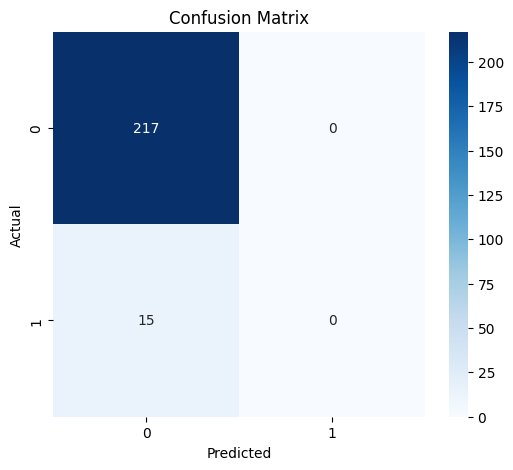

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict probabilities on test set
y_pred = model.predict(X_test)

# Convert predictions and actual values from one-hot encoded to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print performance metrics
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Plot confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
model.save("uber_category_model.keras")

SAVING MODEL THROUGH:

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("uber_category_model.keras")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#STEP 9: EVALUATE PERFORMANCE ON TEST DATA
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)
print(f"\n✅ Test MAE: {test_mae:.2f}")
print(f"✅ Test MSE: {test_mse:.2f}")



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.2905 - mae: 3.7842 - mse: 47.2905 

✅ Test MAE: 3.82
✅ Test MSE: 48.01


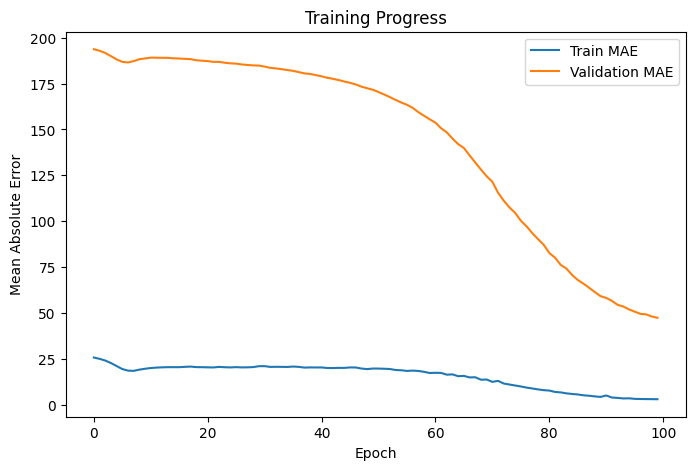

In [ ]:
#STEP 10: PLOT TRAINING PROGRESS
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


### STEP 6: SPLIT DATA INTO TRAINING AND TESTING SETS

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Data split successfully:")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

✅ Data split successfully:
Training set shape: (924, 5), (924,)
Testing set shape: (232, 5), (232,)


END OF MY CODE

### STEP 7: BUILD AND TRAIN THE NEURAL NETWORK MODEL

In [ ]:
# Build the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

print("\n✅ Model trained successfully.")

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2578.0554 - mae: 24.1464 - val_loss: 5035731.5000 - val_mae: 193.2486
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2784.2856 - mae: 23.8706 - val_loss: 5031435.0000 - val_mae: 192.0633
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2510.4480 - mae: 22.3866 - val_loss: 5024922.5000 - val_mae: 190.3546
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2197.9583 - mae: 20.5751 - val_loss: 5015764.5000 - val_mae: 188.5538
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2427.7720 - mae: 19.0758 - val_loss: 5005291.0000 - val_mae: 187.2086
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2790.6172 - mae: 20.1626 - val_loss: 4994070.0000 - val_mae: 186.6071
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1881.0090 - mae: 18.1263 - val_loss: 4981591.5000 - val_mae: 187.1265
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1825.6906 - mae: 17.5037 - val_loss: 4969239.

### STEP 8: EVALUATE THE MODEL

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"\nModel Evaluation on Test Set:")
print(f"Loss (Mean Squared Error): {loss:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Display some predictions vs actual values
print("\nSample Predictions vs Actual:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i][0]:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3007.4180 - mae: 21.9197 

Model Evaluation on Test Set:
Loss (Mean Squared Error): 2201.8030
Mean Absolute Error: 20.0144
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Sample Predictions vs Actual:
Actual: 6.29, Predicted: 21.41
Actual: 6.58, Predicted: 10.89
Actual: 34.91, Predicted: 32.16
Actual: 397.61, Predicted: 63.12
Actual: 6.45, Predicted: 27.46


### STEP 9: VISUALIZE TRAINING HISTORY

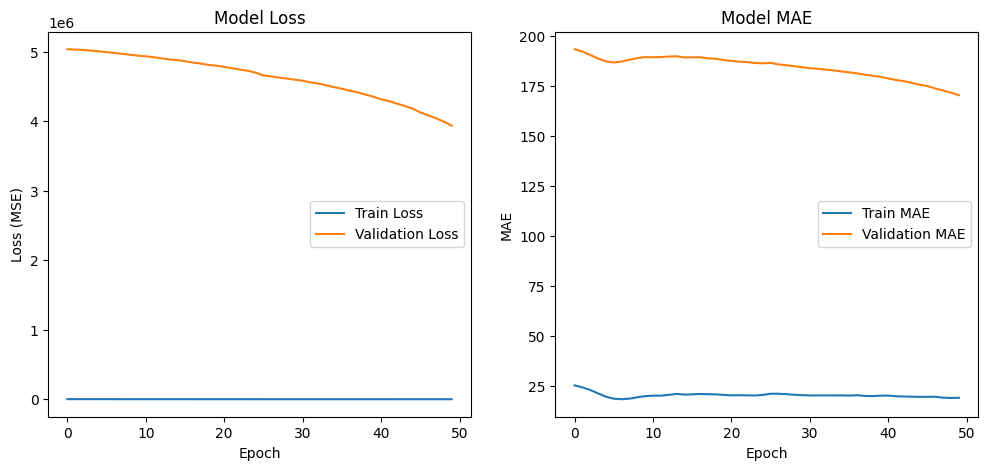

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()